<a href="https://colab.research.google.com/github/Pratik325/ImageClassification_using_SOFTMAX_REGRESSION/blob/master/SOFTMAX_REGRESSION_APPROACH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [0]:
mnist.train.num_examples

55000

In [0]:
mnist.train.images[1].shape

(784,)

In [0]:
mnist.test.num_examples

10000

In [0]:
import matplotlib.pyplot as plt


In [0]:
single_image = mnist.train.images[7].reshape(28,28)

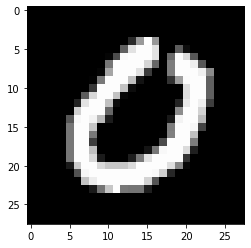

In [0]:
plt.imshow(single_image, cmap='gist_gray')

In [0]:
single_image.min()

0.0

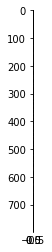

In [0]:
plt.imshow(single_image.reshape(784,1),cmap="gist_gray")

In [0]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [0]:
W = tf.Variable(tf.zeros([784,10]))

In [0]:
b = tf.Variable(tf.zeros([10]))

In [0]:
y = tf.matmul(x,W) + b 

In [0]:
y_true = tf.placeholder(tf.float32, shape=[None,10])

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( labels=y_true,logits = y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9148
